In [1]:
import pandas as pd
import numpy as np

In [2]:
part_d_df = pd.read_csv('data/part_d_2017.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2018.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (25209130, 21)


In [3]:
part_d_df.head(2)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1861409989,THAVASEELAN,PERIN,METHUEN,MA,Internal Medicine,S,LOSARTAN-HYDROCHLOROTHIAZIDE,LOSARTAN/HYDROCHLOROTHIAZIDE,19.0,...,164.0,4920,1055.68,NaN,#,NaN,#,NaN,NaN,NaN
1,1073543153,FORREN,AMY,GOOSE CREEK,SC,Family Practice,S,BUPROPION XL,BUPROPION HCL,NaN,...,85.0,2550,2348.88,NaN,#,NaN,#,NaN,NaN,NaN


In [4]:
exclusion_df.head(2)
len(exclusion_df)

505

In [5]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24792693, 16)


In [6]:
len(exclusion_df['NPI'].unique())

504

In [7]:
len(exclusion_df['SPECIALTY'].unique())

61

In [8]:
len(part_d_df.loc[part_d_df['npi'].isin(exclusion_npi)])

3906

In [9]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
16904,1164515003,FOUNTAIN VALLEY,CA,Internal Medicine,S,MONTELUKAST SODIUM,MONTELUKAST SODIUM,NaN,15,635,217.49,NaN,15.0,635.0,217.49,1
20698,1528088325,MORRISTOWN,TN,Neurology,S,PRAMIPEXOLE DIHYDROCHLORIDE,PRAMIPEXOLE DI-HCL,NaN,22,1020,338.04,NaN,11.0,390.0,93.63,1


In [10]:
# Top 10 states which has the most prescribers
part_d_df_state_count = part_d_df.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_state_count

,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
nppes_provider_state,,,,,,,,,,,,,,,
CA,2394317,2394317,2394317,2394317,2394317,2394317,977922,2394317,2394317,2394317,356280,1402539,1402539,1402539,2394317
NY,1715994,1715994,1715994,1715994,1715994,1715994,645161,1715994,1715994,1715994,234138,1011727,1011727,1011727,1715994
FL,1686023,1686023,1686023,1686023,1686023,1686023,782607,1686023,1686023,1686023,251922,932495,932495,932495,1686023
TX,1575213,1575213,1575213,1575213,1575213,1575213,686140,1575213,1575213,1575213,211645,856767,856767,856767,1575213
PA,1271317,1271317,1271317,1271317,1271317,1271317,478076,1271317,1271317,1271317,167489,749255,749255,749255,1271317
OH,1047087,1047087,1047087,1047087,1047087,1047087,424678,1047087,1047087,1047087,147586,598394,598394,598394,1047087
IL,901698,901698,901698,901698,901698,901698,346009,901698,901698,901698,121411,523932,523932,523932,901698
NC,899910,899910,899910,899910,899910,899910,361322,899910,899910,899910,118741,503543,503543,503543,899910
MI,882556,882556,882556,882556,882556,882556,364086,882556,882556,882556,122075,472565,472565,472565,882556


In [11]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,24788787,24788787,24788787,24788787,24788787,24788787,24788787,9906687,24788787,24788787,24788787,3425546,14078124,14078124,14078124
1,3906,3906,3906,3906,3906,3906,3906,1396,3906,3906,3906,626,2250,2250,2250


In [12]:
# export exclusion providers data to do statistics analysis, run once when needed by uncommenting two lines below
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_exclusion.to_csv('exclusion2017.csv')

In [13]:
len(part_d_df_exclusion['npi'].unique())

101

In [14]:
part_d_df_exclusion[['npi']].to_csv('2017_part_d_e_npi.csv')

In [15]:
len(part_d_df_exclusion['drug_name'].unique())

569

In [16]:
len(part_d_df_exclusion['specialty_description'].unique())

25

In [17]:
part_d_df_exclusion['specialty_description'].unique()

array(['Internal Medicine', 'Neurology', 'Family Practice',
       'Anesthesiology', 'Nurse Practitioner', 'General Practice',
       'Pediatric Medicine', 'Interventional Cardiology',
       'Interventional Pain Management', 'Physician Assistant',
       'Cardiology', 'Diagnostic Radiology', 'Geriatric Medicine',
       'Hematology-Oncology', 'Specialist', 'Dentist', 'General Surgery',
       'Podiatry', 'Orthopaedic Surgery', 'Obstetrics & Gynecology',
       'Psychiatry', 'Emergency Medicine', 'Gastroenterology',
       'Certified Clinical Nurse Specialist',
       'Plastic and Reconstructive Surgery'], dtype=object)

In [18]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_exclusion_npi_count = part_d_df_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_exclusion_npi_count.reset_index(level=["npi"], inplace=True)
part_d_df_exclusion_npi_count

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,1598714784,299,299,299,299,299,299,144,299,299,299,60,217,217,217,299
1,1891803318,218,218,218,218,218,218,80,218,218,218,23,128,128,128,218
2,1417008756,203,203,203,203,203,203,71,203,203,203,14,128,128,128,203
3,1770542151,178,178,178,178,178,178,88,178,178,178,19,81,81,81,178
4,1902916984,154,154,154,154,154,154,54,154,154,154,18,95,95,95,154
5,1164436960,153,153,153,153,153,153,45,153,153,153,27,113,113,113,153
6,1053360966,138,138,138,138,138,138,47,138,138,138,20,81,81,81,138
7,1104898634,136,136,136,136,136,136,65,136,136,136,40,92,92,92,136
8,1013009729,136,136,136,136,136,136,46,136,136,136,18,79,79,79,136
9,1285663682,136,136,136,136,136,136,54,136,136,136,6,68,68,68,136


In [19]:
# Top 10 states which has the most excluded prescribers
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:10]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

,nppes_provider_state,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,NJ,840,840,840,840,840,840,382,840,840,840,116,485,485,485,840
1,VA,403,403,403,403,403,403,123,403,403,403,71,215,215,215,403
2,NY,317,317,317,317,317,317,91,317,317,317,57,204,204,204,317
3,PA,272,272,272,272,272,272,93,272,272,272,41,152,152,152,272
4,TX,267,267,267,267,267,267,107,267,267,267,30,130,130,130,267
5,CA,244,244,244,244,244,244,64,244,244,244,32,176,176,176,244
6,KY,203,203,203,203,203,203,71,203,203,203,14,128,128,128,203
7,TN,200,200,200,200,200,200,62,200,200,200,39,118,118,118,200
8,IL,181,181,181,181,181,181,52,181,181,181,20,107,107,107,181
9,NC,178,178,178,178,178,178,83,178,178,178,50,121,121,121,178


In [20]:
# Top 20 specialties which has the most excluded prescribers
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,1946,1946,1946,1946,1946,1946,689,1946,1946,1946,269,1159,1159,1159,1946
1,Family Practice,965,965,965,965,965,965,298,965,965,965,140,551,551,551,965
2,Anesthesiology,173,173,173,173,173,173,72,173,173,173,50,99,99,99,173
3,Nurse Practitioner,128,128,128,128,128,128,49,128,128,128,37,67,67,67,128
4,General Practice,111,111,111,111,111,111,31,111,111,111,15,71,71,71,111
5,Neurology,107,107,107,107,107,107,45,107,107,107,23,50,50,50,107
6,Cardiology,99,99,99,99,99,99,55,99,99,99,14,56,56,56,99
7,Interventional Pain Management,69,69,69,69,69,69,36,69,69,69,25,42,42,42,69
8,Interventional Cardiology,64,64,64,64,64,64,32,64,64,64,7,39,39,39,64
9,Pediatric Medicine,63,63,63,63,63,63,23,63,63,63,11,25,25,25,63


After full US dataset analysis, will use NJ data to do detailed analysis

In [21]:
part_d_df_small=part_d_df[part_d_df['nppes_provider_state']=='NJ']

In [22]:
len(part_d_df_small)

663531

In [23]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df_small.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,662691,662691,662691,662691,662691,662691,662691,257384,662691,662691,662691,95067,394645,394645,394645
1,840,840,840,840,840,840,840,382,840,840,840,116,485,485,485


In [24]:
# Top specialties which has the most excluded prescribers in small dataset
part_d_df_small_exclusion = part_d_df_small[part_d_df_small['is_excluded'] == 1]
part_d_df_small_exclusion_specialty_count = part_d_df_small_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_small_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_small_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,722,722,722,722,722,722,321,722,722,722,102,426,426,426,722
1,Cardiology,99,99,99,99,99,99,55,99,99,99,14,56,56,56,99
2,Neurology,19,19,19,19,19,19,6,19,19,19,0,3,3,3,19


In [25]:
# add a new field called drug_count to the dataframe
part_d_df_small["drug_count"] = 1

# use the groupby() and agg() methods to create a new dataframe. use numpy sum method to populate values
prescriber_specialty_df = part_d_df_small.groupby(["npi","specialty_description"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
prescriber_specialty_df.head()

,,total_claim_count,drug_count
npi,specialty_description,,
1003002072,Urology,2159,23
1003002858,Nurse Practitioner,1361,35
1003011891,Gastroenterology,738,23
1003012410,Family Practice,1231,45
1003015108,Physician Assistant,11,1


In [27]:
# to merge the tables we need to flatten the indices.
prescriber_specialty_df.reset_index(level=["npi","specialty_description"], inplace=True)

In [28]:
prescriber_specialty_df.head()

,npi,specialty_description,total_claim_count,drug_count
0,1003002072,Urology,2159,23
1,1003002858,Nurse Practitioner,1361,35
2,1003011891,Gastroenterology,738,23
3,1003012410,Family Practice,1231,45
4,1003015108,Physician Assistant,11,1


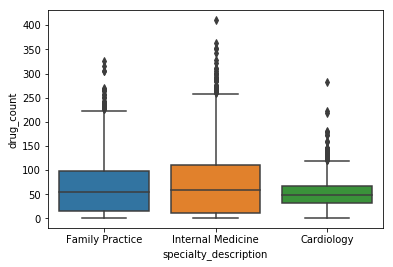

In [29]:
# show that different medical specialties prescribe different numbers of drugs
import seaborn as sb
%matplotlib inline

sb.boxplot(x="specialty_description", y="drug_count", 
           data=prescriber_specialty_df
           [
           (prescriber_specialty_df["specialty_description"] == "Internal Medicine") |
           (prescriber_specialty_df["specialty_description"] == "Family Practice") |
           (prescriber_specialty_df["specialty_description"] == "Cardiology")
           ]
          )

In [30]:
# User pandas crosstab function to create a dataframe where each row is a prescriber identified by their NPI, 
# the columns are the drug generic names, the values are the sum of total_claim_count
npi_generic_cross_df = pd.crosstab(part_d_df_small["npi"], part_d_df_small["generic_name"], values=part_d_df_small["total_claim_count"], 
                                  aggfunc=np.sum)

In [31]:
# To replace the NaN (not a number) from the cells with zero the fillna() method is used.
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [32]:
npi_generic_cross_df.head()

generic_name,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,ABATACEPT/MALTOSE,ABIRATERONE ACETATE,ACAMPROSATE CALCIUM,ACARBOSE,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
npi,,,,,,,,,,,,,,,,,,,,,
1003002072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003002858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003011891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003012410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003015108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# use npi to merge two tables prescriber_specialty_df and npi_generic_cross_df
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [34]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1003002072,Urology,2159,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003002858,Nurse Practitioner,1361,35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003011891,Gastroenterology,738,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003012410,Family Practice,1231,45,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003015108,Physician Assistant,11,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_description", "npi"])

In [36]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
1653,1063624823,Addiction Medicine,15,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10768,1437223161,Addiction Medicine,620,24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15730,1639295470,Addiction Medicine,15,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20021,1801833520,Addiction Medicine,14,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,1003878943,Allergy/ Immunology,83,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Since the data has been resorted by specialty_desc and npi, index needs to be updated to reflect new order of data
prescriber_specialty_generic_df=prescriber_specialty_generic_df.reset_index(drop=True)
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1063624823,Addiction Medicine,15,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1437223161,Addiction Medicine,620,24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1639295470,Addiction Medicine,15,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1801833520,Addiction Medicine,14,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003878943,Allergy/ Immunology,83,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_small_exclusion_npi_count = part_d_df_small_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_small_exclusion_npi_count

,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
npi,,,,,,,,,,,,,,,
1598714784,299,299,299,299,299,299,144,299,299,299,60,217,217,217,299
1891803318,218,218,218,218,218,218,80,218,218,218,23,128,128,128,218
1770542151,178,178,178,178,178,178,88,178,178,178,19,81,81,81,178
1336186600,99,99,99,99,99,99,55,99,99,99,14,56,56,56,99
1235200775,27,27,27,27,27,27,9,27,27,27,0,0,0,0,27
1881615268,19,19,19,19,19,19,6,19,19,19,0,3,3,3,19


In [83]:
# Based on analyzed result, the interested excluded npi is 1598714784
# we need to find out the position of 1598714784 based on this script, the result is 11878
# update the position of the rest of the scripts using 11878
prescriber_specialty_generic_df.loc[prescriber_specialty_generic_df['npi'] == 1336186600]

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL-WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
627,1336186600,Cardiology,9655,99,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
#part_d_df_small_exclusion[part_d_df_small_exclusion['specialty_description'] == 'Cardiology']

In [81]:
part_d_df_exclusion.loc[part_d_df_exclusion['npi'] == 1336186600].head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
332248,1336186600,PATERSON,NJ,Cardiology,S,LABETALOL HCL,LABETALOL HCL,NaN,17,510,290.27,NaN,NaN,NaN,NaN,1
501018,1336186600,PATERSON,NJ,Cardiology,S,XARELTO,RIVAROXABAN,17.0,66,2264,29302.31,NaN,44.0,1560.0,20234.60,1
589988,1336186600,PATERSON,NJ,Cardiology,S,PROAIR HFA,ALBUTEROL SULFATE,15.0,43,1121,2696.20,NaN,30.0,733.0,1965.81,1
649307,1336186600,PATERSON,NJ,Cardiology,S,FAMOTIDINE,FAMOTIDINE,42.0,164,6671,1232.31,NaN,138.0,5596.0,996.53,1
671177,1336186600,PATERSON,NJ,Cardiology,S,CARVEDILOL,CARVEDILOL,95.0,452,17894,2991.99,80.0,386.0,15254.0,2469.62,1


Shift from using the Pandas dataframe object to the `numpy.array`. Slice off the columns that are not related to the number of filled prescriptions and convert this to a matrix. The `iloc()` method slices a dataframe by the column and the method `as_matrix()` converts the dataframe into a numpy array.

In [84]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [85]:
pf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
identifiers_matrix = prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [87]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [88]:
generic_array

Index(['0.9 % SODIUM CHLORIDE', 'ABACAVIR SULFATE',
       'ABACAVIR SULFATE/LAMIVUDINE', 'ABACAVIR/DOLUTEGRAVIR/LAMIVUDI',
       'ABACAVIR/LAMIVUDINE/ZIDOVUDINE', 'ABATACEPT', 'ABATACEPT/MALTOSE',
       'ABIRATERONE ACETATE', 'ACAMPROSATE CALCIUM', 'ACARBOSE',
       ...
       'ZALEPLON', 'ZIDOVUDINE', 'ZILEUTON', 'ZIPRASIDONE HCL',
       'ZOLEDRONIC ACID', 'ZOLEDRONIC ACID/MANNITOL-WATER', 'ZOLMITRIPTAN',
       'ZOLPIDEM TARTRATE', 'ZONISAMIDE', 'ZOSTER VACCINE LIVE/PF'],
      dtype='object', length=1217)

In [89]:
# to compute the distance between a vector representing the drugs that a prescriber prescribes 
# we need to import the scipy.spatial library.
import scipy.spatial

Normalize the claim count of prescriptions by the total number of claims for the prescriber. Each entry now represent the percentage of total claims that are associated with the prescriber.

In [90]:
np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

array([[ 15.],
       [620.],
       [ 15.],
       ...,
       [ 55.],
       [121.],
       [275.]])

In [91]:
np.sum(pf_matrix,1)

array([ 15., 620.,  15., ...,  55., 121., 275.])

In [92]:
pf_matrix.shape[0]

24955

In [93]:
pf_matrix.shape[0],1

(24955, 1)

In [94]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [95]:
normalized_pf_matrix.shape

(24955, 1217)

Use the euclidean distance to compute the distance between two prescribers. The results of the pdist() function need to be placed into square form. 

In [96]:
prescriber_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, "euclidean"))

In [97]:
prescriber_dist.shape

(24955, 24955)

As we have sorted the prescribers by their specialty then we expect to see some spatial patterns in the distance matrix. A matrix can be visualized using the `matplotlib` library.

In [56]:
import matplotlib.pyplot as plt

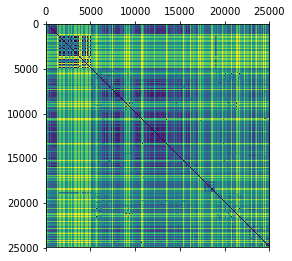

In [98]:
plt.matshow(prescriber_dist)

In [99]:
prescriber_specialty_generic_df.iloc[627,0:4]

npi                      1336186600
specialty_description    Cardiology
total_claim_count              9655
drug_count                       99
Name: 627, dtype: object

In [100]:
providers_sorted = np.lexsort((prescriber_dist[:,627].tolist(),))

In [101]:
# The prescriber referenced at position 17368 is an Internal Medicine. 
# We can now calculate the prescribers most similar to this Internal Medicine.
prescriber_dist[627,:]
np.sort(prescriber_d627ist[])[providers_sorted[0:16]]

array([0.13676763, 0.46989291, 0.12897949, 0.50809551, 0.46989888,
       0.60570713, 0.13554396, 0.14357958, 0.14438351, 0.14086778,
       0.38211808, 0.1355151 , 0.13865575, 0.13946315, 0.14460139,
       0.14236772])

In [102]:
# plotting the distances we can see that prescribers most like are probably also Internal Medicine.
#plt.scatter(np.arange(prescriber_dist.shape[0]),prescriber_dist[11878,:])

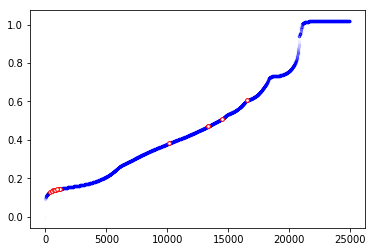

In [103]:
dis_range = np.arange(prescriber_dist.shape[0])
#plt.scatter(np.arange(prescriber_dist.shape[0]),np.sort(prescriber_dist[11878,:]))
plt.scatter(dis_range,np.sort(prescriber_dist[627,:]), color='blue', alpha=0.01, s=7)
plt.scatter(dis_range[providers_sorted[0:16]],np.sort(prescriber_dist[627])[providers_sorted[0:16]], color='white', alpha=1, s=14, edgecolor='red')

In [104]:
#providers_sorted = np.lexsort((prescriber_dist[:,11878].tolist(),))

In [105]:
providers_sorted[0:16]

array([  627, 13352,   380, 14450, 13353, 16567,   575,  1103,  1162,
         841, 10166,   571,   717,   763,  1181,   984], dtype=int64)

In [106]:
prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()[providers_sorted[0:16],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1336186600, 'Cardiology'],
       [1790752889, 'Interventional Cardiology'],
       [1073559597, 'Cardiology'],
       [1023356201, 'Nurse Practitioner'],
       [1801874045, 'Interventional Cardiology'],
       [1871597476, 'Nurse Practitioner'],
       [1275550915, 'Cardiology'],
       [1902851355, 'Cardiology'],
       [1972530707, 'Cardiology'],
       [1598744898, 'Cardiology'],
       [1073672085, 'Internal Medicine'],
       [1265636526, 'Cardiology'],
       [1437159902, 'Cardiology'],
       [1487687794, 'Cardiology'],
       [1992726152, 'Cardiology'],
       [1790702678, 'Cardiology']], dtype=object)

In [59]:
np.lexsort(((-1 * pf_matrix[11878,:]).tolist(),))[0:16]

array([  89,   56,  714,  739,  657,   26,  502,  503,  514,  928,   45,
       1045,  680, 1021,  252,  658,  847], dtype=int64)

In [60]:
generic_array[np.lexsort(((-1 * pf_matrix[11878,:]).tolist(),))][0:16]

Index(['ATORVASTATIN CALCIUM', 'AMLODIPINE BESYLATE', 'METFORMIN HCL',
       'METOPROLOL SUCCINATE', 'LEVOTHYROXINE SODIUM', 'ALBUTEROL SULFATE',
       'FUROSEMIDE', 'GABAPENTIN', 'GLIMEPIRIDE', 'PIOGLITAZONE HCL',
       'ALPRAZOLAM', 'SIMVASTATIN', 'LOSARTAN POTASSIUM',
       'ROSUVASTATIN CALCIUM', 'CLOPIDOGREL BISULFATE', 'LIDOCAINE'],
      dtype='object')

In [61]:
part_d_df_small[part_d_df_small["npi"]==1598714784].sort_values("total_claim_count", ascending=False)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded,drug_count
18492962,1598714784,WEST PATERSON,NJ,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,145.0,930,33122,11802.26,106.0,693.0,25292.0,9059.12,1,1
22426056,1598714784,WEST PATERSON,NJ,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,127.0,774,29691,3385.05,96.0,557.0,22101.0,2583.63,1,1
79745,1598714784,WEST PATERSON,NJ,Internal Medicine,S,METFORMIN HCL,METFORMIN HCL,106.0,658,26074,3596.29,77.0,465.0,18403.0,2616.50,1,1
13458524,1598714784,WEST PATERSON,NJ,Internal Medicine,S,METOPROLOL SUCCINATE,METOPROLOL SUCCINATE,97.0,629,24530,13863.95,78.0,511.0,20077.0,11410.27,1,1
3815070,1598714784,WEST PATERSON,NJ,Internal Medicine,S,FUROSEMIDE,FUROSEMIDE,106.0,584,19344,1917.91,84.0,453.0,15402.0,1496.53,1,1
10621430,1598714784,WEST PATERSON,NJ,Internal Medicine,S,LEVOTHYROXINE SODIUM,LEVOTHYROXINE SODIUM,76.0,546,19793,8527.81,54.0,386.0,14674.0,6142.95,1,1
14692360,1598714784,WEST PATERSON,NJ,Internal Medicine,S,GABAPENTIN,GABAPENTIN,108.0,535,19283,7543.03,70.0,320.0,12002.0,4009.89,1,1
5149504,1598714784,WEST PATERSON,NJ,Internal Medicine,S,GLIMEPIRIDE,GLIMEPIRIDE,85.0,534,21101,7970.92,56.0,349.0,14070.0,4990.59,1,1
1331960,1598714784,WEST PATERSON,NJ,Internal Medicine,S,PIOGLITAZONE HCL,PIOGLITAZONE HCL,77.0,526,20211,21062.24,56.0,369.0,14620.0,15954.66,1,1
2364441,1598714784,WEST PATERSON,NJ,Internal Medicine,S,ALPRAZOLAM,ALPRAZOLAM,75.0,514,14251,3007.81,38.0,250.0,6970.0,1607.14,1,1
